<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.

<Axes: ylabel='Density'>

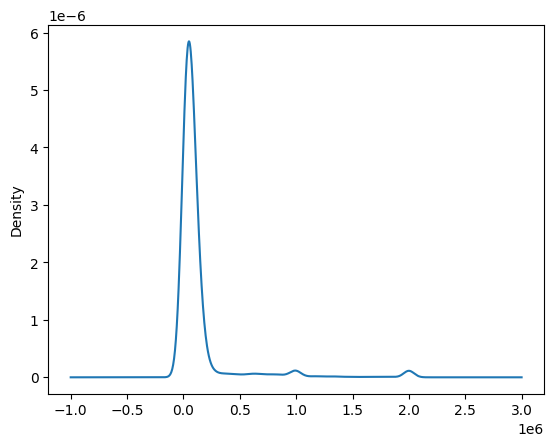

In [51]:
# your code goes here
df['ConvertedComp'].plot(kind='density') #Density graph

Plot the histogram for the column `ConvertedComp`.


<Axes: ylabel='Frequency'>

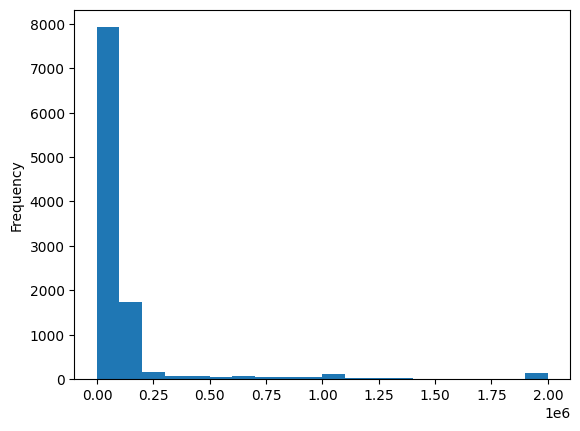

In [52]:
# your code goes here
df['ConvertedComp'].plot(kind='hist', bins=20)

What is the median of the column `ConvertedComp`?


In [35]:
# your code goes here
df['ConvertedComp'].median()

57745.0

How many responders identified themselves only as a **Man**?


In [41]:
# your code goes here
df['Gender'].value_counts()

#10480 responders indentify themselves as a man

Gender
Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: count, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [48]:
# your code goes here
women = df[df['Gender'] == 'Woman'] #Select from the column gender only the Woman values

women['ConvertedComp'].median() #Calculates the median of responders identified themselves only as a Woman

57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [95]:
# your code goes here
min = df['Age'].min() #The min
Q1 = df['Age'].quantile(0.25) #The 0.25 q1 quartile
Q2 = df['Age'].quantile(0.50) #The 0.50 q2 quartile
Q3 = df['Age'].quantile(0.75) #The 0.75 q3 quartile
max = df['Age'].max() #The max

print(f" Min: {min}\n Q1: {Q1}\n Q2: {Q2}\n Q3: {Q3}\n Max: {max}\n") #Show the values

 Min: 16.0
 Q1: 25.0
 Q2: 29.0
 Q3: 35.0
 Max: 99.0



Plot a histogram of the column `Age`.


<Axes: ylabel='Frequency'>

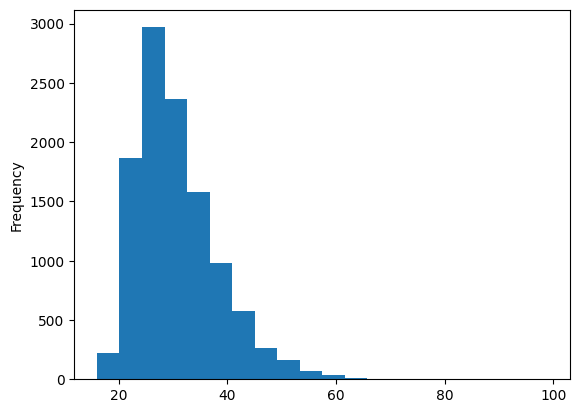

In [63]:
# your code goes here
df['Age'].plot(kind='hist', bins=20)

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


<Axes: >

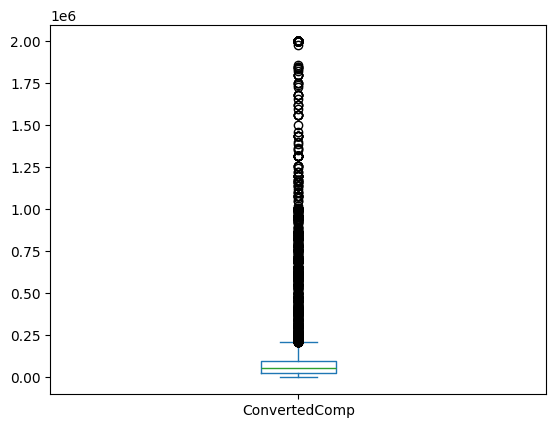

In [70]:
# your code goes here
df['ConvertedComp'].plot(kind='box')

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [66]:
# your code goes here
Q1 = df['ConvertedComp'].quantile(0.25) #The 0.25 q1 quartile
Q2 = df['ConvertedComp'].quantile(0.50) #The 0.50 q2 quartile
Q3 = df['ConvertedComp'].quantile(0.75) #The 0.75 q3 quartile

print(f" Q1: {Q1}\n Q2: {Q2}\n Q3: {Q3}\n") #Show the values

 Q1: 26868.0
 Q2: 57745.0
 Q3: 100000.0



Find out the upper and lower bounds.


In [72]:
# your code goes here
Q1 = df['ConvertedComp'].quantile(0.25) #The 0.25 q1 quartile
Q3 = df['ConvertedComp'].quantile(0.75) #The 0.75 q3 quartile

IQR = Q3 - Q1 #Calculates the IQR, by subtracting 0.75 from 0.25 (Q3 - Q1)

print(IQR) #Show the result

73132.0


Identify how many outliers are there in the `ConvertedComp` column.


In [86]:
# your code goes here
lower_bound = Q1 - 1.5 * IQR #Calculating the outliers with the formula Q1 - 1.5 * IQR, the lower bound
upper_bound = Q3 + 1.5 * IQR #Calculating the outliers with the formula Q1 - 1.5 * IQR, the upper bound, this will be the outliers

outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)] #Selects the values that are less than the lower bound, and then selects the values that are higher than the upper bound

outliers['ConvertedComp'].count() #Counting the quantity of outliers

879

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [90]:
# your code goes here
df_without_outliers = outliers = df[(df['ConvertedComp'] >= lower_bound) | (df['ConvertedComp'] <= upper_bound)] #Basically this is the previous line of code but with the >< inverted
                                                                                                                 #Thus, the dataframe will only contain the values that are not outliers

df_without_outliers.head(3)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [93]:
# your code goes here
numerical_columns = df.select_dtypes(include=['number']) #Selects the columns that contains number with include=['number']

correlations = numerical_columns.corrwith(df['Age']) #This find a correlation between the variable 'numerical_columns' and the column 'Age'.

correlations

Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
dtype: float64

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
